In [1]:
from sympy import *
from sympy.plotting import plot

x = Symbol("x")
f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
f

-18*x**3 + 5*x**2 + 10*x - 30

In [2]:
# 1. Определить корни
#    Нули функции
y = solve(f) 
y

[5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3,
 5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)),
 -(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54]

In [3]:
# имеем три жутких корня (см вывод выше)
x1 = complex(y[0])
x2 = complex(y[1])
x3 = float(y[2]) 
x1, x2, x3

((0.7611788051223338+0.8716345854714483j),
 (0.7611788051223338-0.8716345854714483j),
 -1.2445798324668897)

In [11]:
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает

f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)
f_diff

[-oo, 5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54, oo]

In [5]:
incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")

print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")

Убывает на интервалах:
[-oo, 5/54 - sqrt(565)/54]
[5/54 + sqrt(565)/54, oo]
Возрастает на интервалах:
[5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54]


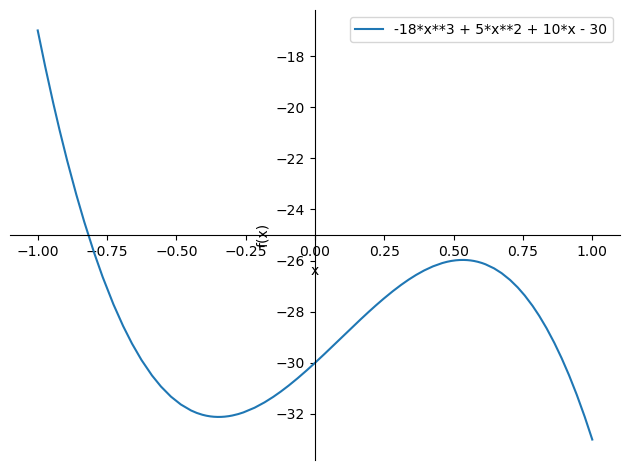

In [15]:
# 4. Построить график

plot(f, (x, -1, 1), legend=True)

In [7]:
# 5. Вычислить вершину
#    Экстремумы функции

ext_list = solve(diff(f), x)

for i in ext_list:
    res = f.subs(x, i)
    if res < 0:
        print(f"Точка минимума: (x:{i}, y:{res})")
    elif res > 0:
        print(f"Точка максимума: (x:{i}, y:{res})")

Точка минимума: (x:5/54 - sqrt(565)/54, y:-785/27 - 5*sqrt(565)/27 + 5*(5/54 - sqrt(565)/54)**2 - 18*(5/54 - sqrt(565)/54)**3)
Точка минимума: (x:5/54 + sqrt(565)/54, y:-785/27 - 18*(5/54 + sqrt(565)/54)**3 + 5*(5/54 + sqrt(565)/54)**2 + 5*sqrt(565)/27)


In [8]:
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0
#    Знакопостоянства функции
solve(0 < f) # поскольку корни комплексные, получается такая ерунда

(-oo < x) & (x < CRootOf(18*x**3 - 5*x**2 - 10*x + 30, 0))

In [9]:
solve(0 > f)

(x < oo) & (CRootOf(18*x**3 - 5*x**2 - 10*x + 30, 0) < x)